In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

## load data

In [2]:
df = pd.read_csv("./input_data/data-logistic.csv", names = ["target", "feature1", "feature2"])

In [3]:
df.head()

,target,feature1,feature2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


# easier to work with numpy arrays here

In [4]:
y = np.array(df["target"])
X = np.array(df[["feature1", "feature2"]])

C = 10
k_step = 0.1

## algorithm of log_regression 
0) initial guess as the array of zeros ->
1) train the model using gradient_descent ->
3) compute the probabilities

In [5]:
# helping func, sigmoid can be used as well
def func(i, y, x, w):
    return y[i] * x[i] * (1 - 1 / (1 + np.exp(-y[i] * np.sum(x[i] * w))))
    
def gradient_step(x, y, w, C, k_step):   
    ban = C * w
    
    n = len(y)
    out = np.sum([func(i, y, x, w) for i in range(n)], axis=0) / n
    
    return k_step * (out - ban)

def gradient_descent(x, y, w, C, k_step, n_iter = 10**5, epsilon=1e-5, full_output=False):

    history = [w.copy()]
    step_vec = gradient_step(x, y, w.copy(), C, k_step)
    step = np.sqrt(np.sum(step_vec**2))

    idx = 0
    while step > epsilon and idx < n_iter:
        step_vec = gradient_step(x, y, w.copy(), C, k_step)
        w += step_vec
        history.append(w.copy())
    
        step = np.sqrt(np.sum(step_vec**2))
        idx += 1
    return {'coefs':w, 'history':history, 'n_iter':idx} if full_output else w


def sigmoid(x, w):
    scalar = np.sum(x * w, axis=1)
    return 1.0 / (1.0 + np.exp(-scalar))

def log_regression(x, y, C=10, k_step=0.1):
    
    w = np.zeros(2)
    w_fin = gradient_descent(X, y, w, C, k_step)
    
    predictions = sigmoid(x, w_fin)
    return predictions

## first without regularization then with it

In [6]:
p0 = log_regression(X,y, C=0)
score0 = roc_auc_score(y, p0)
score0

0.9268571428571428

In [7]:
p1 = log_regression(X,y, C=10)
score1 = roc_auc_score(y, p1)
score1

0.9362857142857142

In [8]:
w = open("./week3/log_regression.dat", "w")
w.write(f"{np.round(score0, 3)} {np.round(score1, 3)}")
w.close()

## step size vs the number of iterations
k_step should scale as 1/n_iter

In [9]:
w = np.zeros(2)
k_step = 0.1
d = gradient_descent(X, y, w, C, k_step, full_output=True)

w = d["coefs"]
history = d["history"]
d["n_iter"]

8

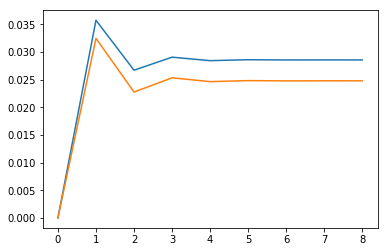

In [10]:
plt.plot(np.array(history)[:, 0])
plt.plot(np.array(history)[:, 1])

In [11]:
w = np.zeros(2)
k_step = 0.01
d = gradient_descent(X, y, w, C, k_step, full_output=True)

w = d["coefs"]
history = d["history"]
d["n_iter"]

47

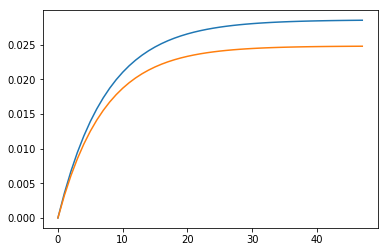

In [12]:
plt.plot(np.array(history)[:, 0])
plt.plot(np.array(history)[:, 1])

In [13]:
w = np.zeros(2)
k_step = 0.001
d = gradient_descent(X, y, w, C, k_step, full_output=True)

w = d["coefs"]
history = d["history"]
d["n_iter"]

305

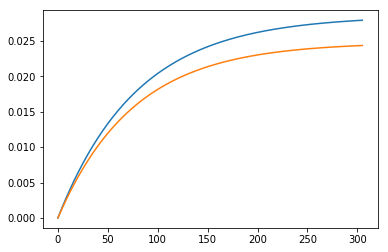

In [14]:
plt.plot(np.array(history)[:, 0])
plt.plot(np.array(history)[:, 1])

## though the learning curves become less noisy the algorithm takes more steps

In [16]:
w = np.array([2.,2.])
k_step = 0.001
d = gradient_descent(X, y, w, C, k_step, full_output=True)

w = d["coefs"]
history = d["history"]
d["n_iter"]

682

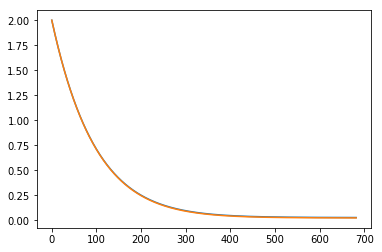

In [17]:
plt.plot(np.array(history)[:, 0])
plt.plot(np.array(history)[:, 1])

## starting point (2, 2) -> the same local min